In [16]:
%autosave 300

Autosaving every 300 seconds


In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from adam_wrangle import train_val_test
from scipy import stats

Let's read in our dataset.

For reference, I have [documentation](https://www.brilliance.com/education/diamonds/depth-table) for the depth and table features of the dataset.

Here is more [information](https://www.vrai.com/journal/post/diamond-clarity-chart) on diamond clarity.

[Here](https://www.diamonds.pro/education/color/) we can learn more about diamond color.

Fun picture:
![Diamond clarity](diamond_quality.avif)

In [18]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


What are some things we should do initially?

In [19]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [21]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
df.shape

(53940, 10)

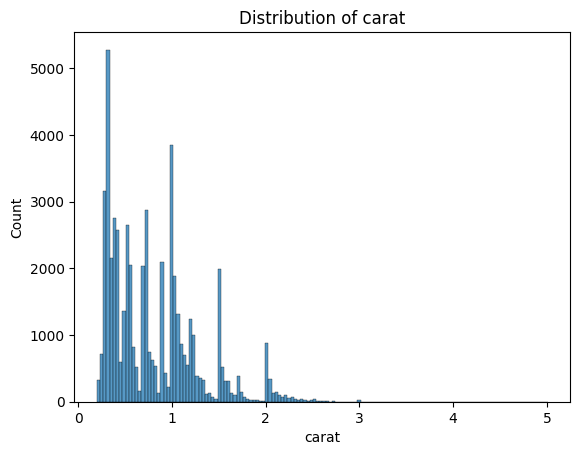

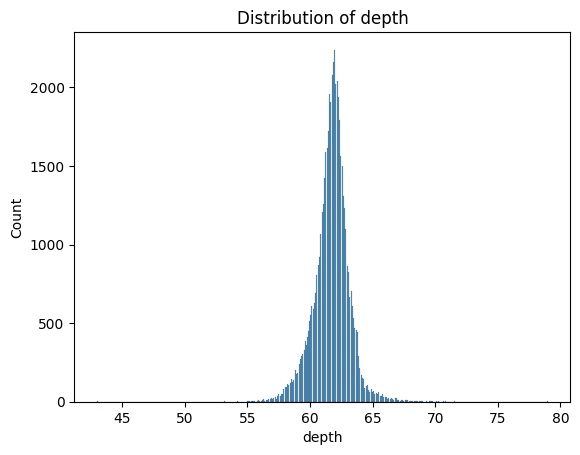

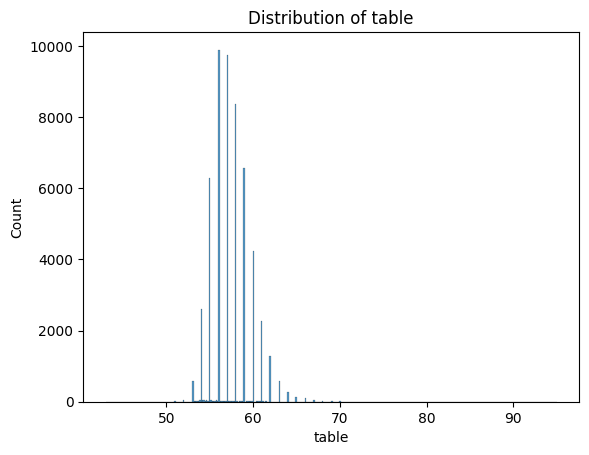

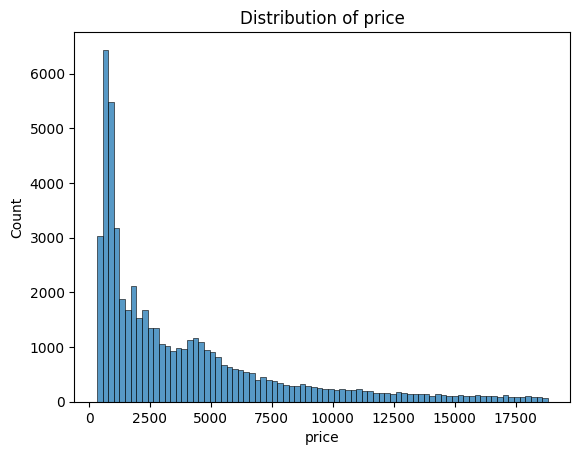

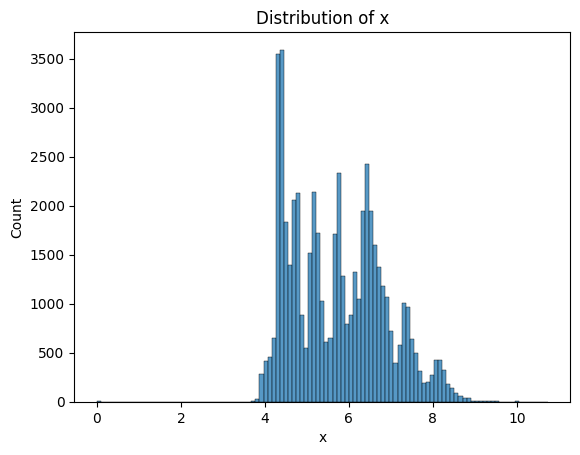

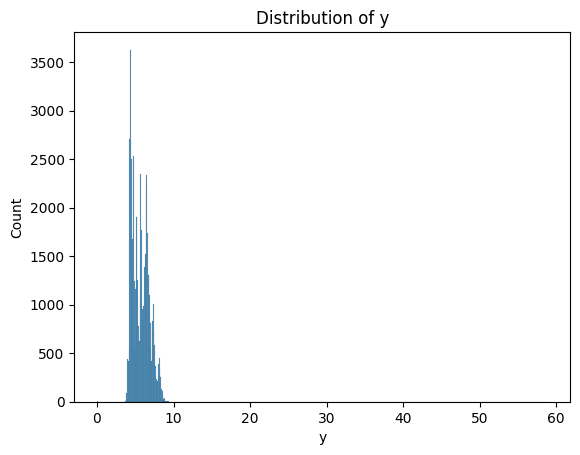

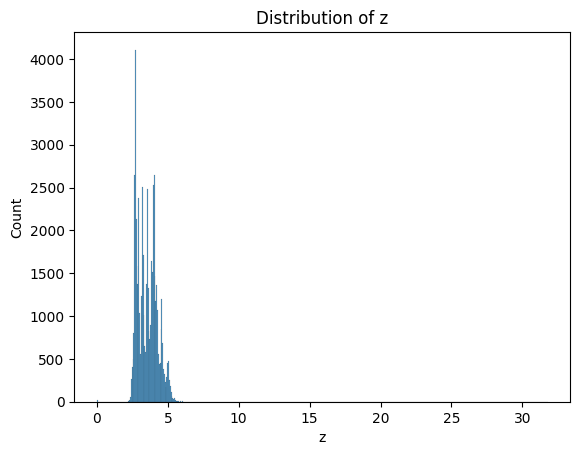

In [23]:
for col in df.columns[df.dtypes != 'object']:
    plt.figure()
    sns.histplot(data = df, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

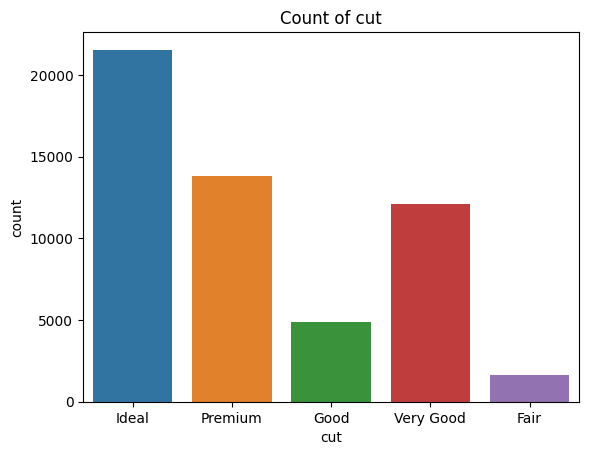

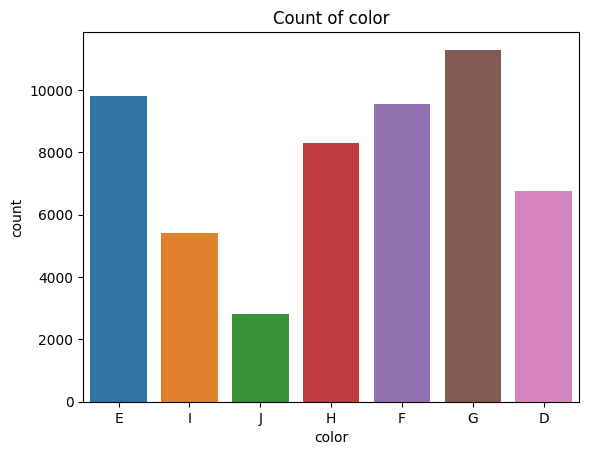

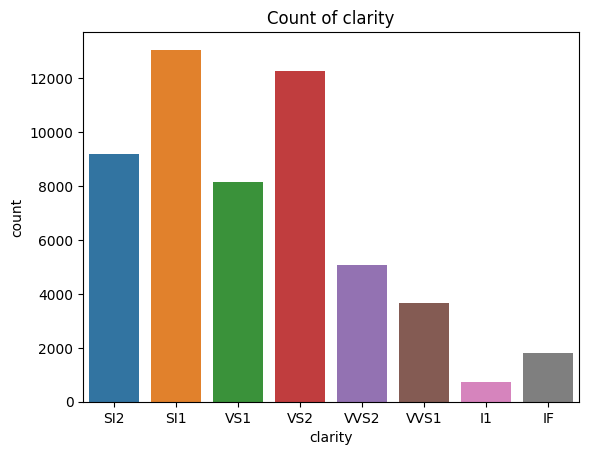

In [24]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    sns.countplot(data = df, x = col)
    plt.title(f'Count of {col}')
    plt.show()

Now that we want to explore relationships between features in our dataset, what do we need to do?

In [25]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((37758, 10), (8091, 10), (8091, 10))

What are some questions we want to ask of our data?

What are some questions we want to ask of our data.

0. Does clarity have a relationship with price.  
0. Does depth habe a relationship with price.  
0. Does carat have a relationship with price.

In [26]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
19498,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31230,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22312,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
279,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6647,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


## Question 1

Does clarity affect price?

Clarity is categorical and price is continuous

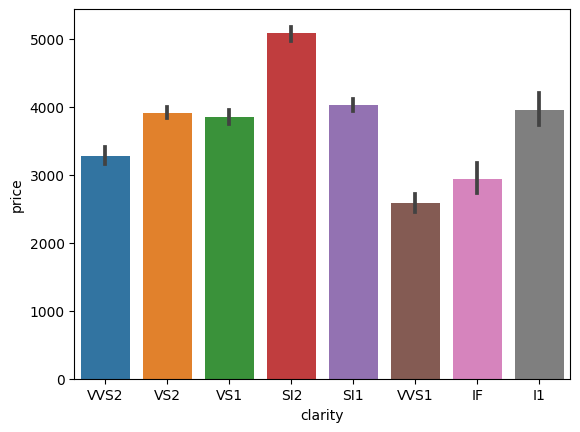

In [28]:
sns.barplot(data=train, x='clarity', y='price')
plt.show()

Yes, clarity may have a relationship with price. Using my domain knowledge, the most clear diamonds do not have the highest average price.  
I think other features of this dataset may have a greater impact on price.

## Question 2

Does depth affect price?  
Two continuous features, let's make a scatter plot.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


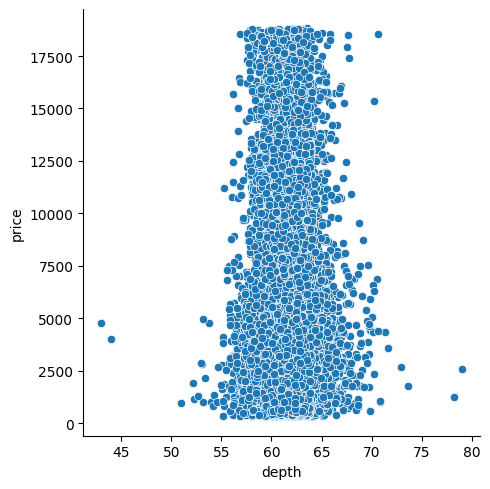

In [32]:
sns.relplot(data=train, x='depth', y='price')
plt.show()

Judging by the chart, depth will not help us predict the price of a daimond.

## Question 3

Does carat affect price?  
Both continuous features, let's make a scatter plot.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


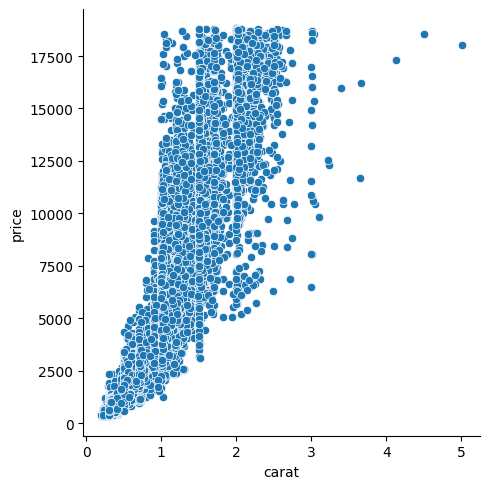

In [34]:
sns.relplot(data=train, x='carat', y='price')
plt.show()

Null hypothesis: There is no correlation between carat and price.  
Alternative hypothesis: There is a correlation between carat and price.

In [38]:
r, p = stats.spearmanr(train.carat, train.price)
r, p

(0.9631084633416993, 0.0)

In [43]:
alpha = 0.05
if p < alpha:
    print('Reject the null.')
else:
    print('Fail to reject the null')

Reject the null.


There is a strong, positive correlation between carat and price. The relationship is significant, and i think carat will help my model predict price.